In [2]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
input_path = '../input'
x = os.listdir(input_path)
path = glob.glob(os.path.join(input_path,x[0]))[0]
data_path = os.path.join(path, os.listdir(path)[0])

df = pd.read_csv(data_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print(df.shape)
print(df.columns)

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [9]:
for c in df.columns:
    missing_val = df[c].isnull().sum()
    if missing_val > 0:
        print(c)
        print(missing_val)
    
    else:
        print(c)
        print(f'No missing val\n')    

diagnosis
No missing val

radius_mean
No missing val

texture_mean
No missing val

perimeter_mean
No missing val

area_mean
No missing val

smoothness_mean
No missing val

compactness_mean
No missing val

concavity_mean
No missing val

concave points_mean
No missing val

symmetry_mean
No missing val

fractal_dimension_mean
No missing val

radius_se
No missing val

texture_se
No missing val

perimeter_se
No missing val

area_se
No missing val

smoothness_se
No missing val

compactness_se
No missing val

concavity_se
No missing val

concave points_se
No missing val

symmetry_se
No missing val

fractal_dimension_se
No missing val

radius_worst
No missing val

texture_worst
No missing val

perimeter_worst
No missing val

area_worst
No missing val

smoothness_worst
No missing val

compactness_worst
No missing val

concavity_worst
No missing val

concave points_worst
No missing val

symmetry_worst
No missing val

fractal_dimension_worst
No missing val



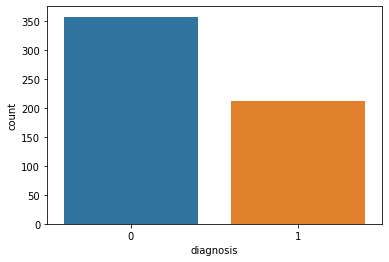

In [10]:
import seaborn as sns
sns.countplot(df['diagnosis'], label='Sum')
plt.show()

In [11]:
X = df.iloc[:,1:]
y = df.loc[:,['diagnosis']]

## Data Set Without dimensionality reduction

## Classifiers:
- Logistic Regression
- Descision Tree
- Support Vector Machine
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Random Forest
- k-nearest Neighbours
- Naive Bayes

In [102]:
# Voting Ensemeble for classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

class ensemble_class:

    def __init__(self, X, y, vot_param, vot_type):
        self.X = X
        self.y = y
        self.vot_param = vot_param
        self.vot_type = vot_type
    
    # get the dataset
    def get_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y, test_size=0.3)
        return X_train, X_test, y_train, y_test

    # get a voting ensemble of models
    def get_voting(self):
        #define base models:
        models = list()
        models.append(('LR', LogisticRegression()))
        models.append(('DT', DecisionTreeClassifier()))
        models.append(('SVM', SVC(probability = True)))
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('QDA', QuadraticDiscriminantAnalysis()))
        models.append(('RF', RandomForestClassifier()))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('NB', GaussianNB()))

        # define the voting ensemble
        ensemble = VotingClassifier(estimators = models, voting = self.vot_param)

        return ensemble

    # get a list of models to evaluate
    def get_models(self):
        models = dict()
        models['LR'] = LogisticRegression()
        models['DT'] = DecisionTreeClassifier()
        models['SVM'] = SVC(probability = True)
        models['LDA'] = LinearDiscriminantAnalysis()
        models['QDA'] = QuadraticDiscriminantAnalysis()
        models['RF'] = RandomForestClassifier()
        models['KNN'] = KNeighborsClassifier()
        models['NB'] = GaussianNB()
        models[self.vot_type] = self.get_voting()

        return models

    # evaluate a give model using cross-validation
    @staticmethod
    def evaluate_model(model, X_train, y_train):
        kfold = StratifiedKFold(n_splits=10)
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')
        return scores
    
    #get the models to evaluate
    @staticmethod
    def get_results(models, X_train, y_train, res, nm):
        
        results, names = res, nm
        for name, model in models.items():
            scores = evaluate_model(model, X_train, y_train)
            results.append(scores)
            names.append(name)
            print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
        # plot model performance for comparison
        plt.figure(figsize=(12,6))
        plt.boxplot(results, labels=names, showmeans=True)
        plt.show()
        
    #fit the ensemble model and get the metrics parameters
    def evaluate_acc(self, model_type, X_train, X_test, y_train, y_test):
        model_ens = model_type
        model_ens.fit(X_train, y_train)
        pred = model_ens.predict(X_test)

        acc = accuracy_score(y_test, pred)
        prec = precision_score(y_test, pred)
        recall = recall_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        
        if self.vot_param == 'hard':
            roc_auc = 'not applicable'
        else:
            prob = model_ens.predict_proba(X_test)[:,1]
            roc_auc = roc_auc_score(y_test, prob)
            
        return acc,prec,recall,f1,roc_auc

>LR 0.952 (0.029)
>DT 0.915 (0.045)
>SVM 0.920 (0.055)
>LDA 0.947 (0.038)
>QDA 0.942 (0.039)
>RF 0.955 (0.032)
>KNN 0.942 (0.042)
>NB 0.947 (0.037)
>hard_voting 0.962 (0.034)


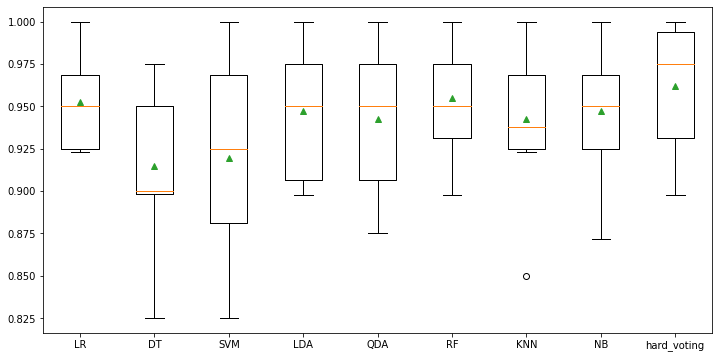

In [103]:
# for voting classifier hard

hard_class = ensemble_class(X, y, 'hard', 'hard_voting')
X_train, X_test, y_train, y_test = hard_class.get_data()
models = hard_class.get_models()
hard_class.get_results(models, X_train, y_train, [], [])

acc_hard, prec_hard, recal_hard, f1_hard, roc_auc_hard = hard_class.evaluate_acc(models['hard_voting'], X_train, X_test, y_train, y_test)

>LR 0.937 (0.028)
>DT 0.925 (0.035)
>SVM 0.920 (0.039)
>LDA 0.952 (0.028)
>QDA 0.955 (0.027)
>RF 0.955 (0.030)
>KNN 0.935 (0.034)
>NB 0.942 (0.032)
>soft_voting 0.965 (0.020)


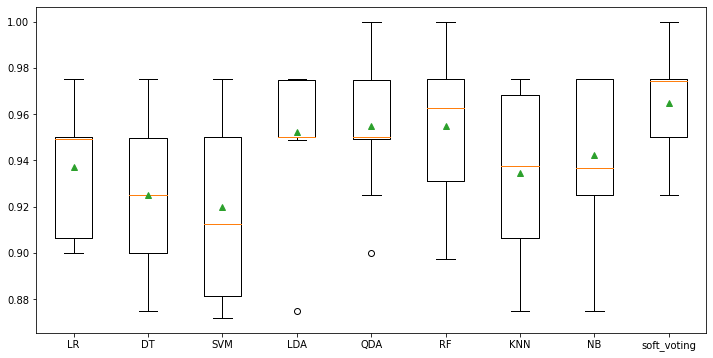

In [104]:
# for voting classifier soft

soft_class = ensemble_class(X, y, 'soft', 'soft_voting')
X_train, X_test, y_train, y_test = soft_class.get_data()
models = soft_class.get_models()
soft_class.get_results(models, X_train, y_train, [], [])

acc_soft, prec_soft, recal_soft, f1_soft, roc_auc_soft = soft_class.evaluate_acc(models['soft_voting'], X_train, X_test, y_train, y_test)

## Comaprison of the two voting classing ensemble approach

In [105]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recal_hard, recal_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.959064,0.983871,0.910448,0.945736,0.994403
0,Ensebling_hard,0.947368,0.969231,0.900000,0.933333,not applicable
